In [1]:
#cd /Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project1/stats

/Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project1/stats


In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
games = pd.read_csv('/Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project1_baseball/games/games.csv')
games

,type,multi2,multi3,multi4,multi5,multi6,event,game_id,year
0,id,ALS193307060,NaN,NaN,NaN,NaN,NaN,ALS193307060,1933
1,version,1,NaN,NaN,NaN,NaN,NaN,ALS193307060,1933
2,info,inputprogvers,version 7RS(19) of 07/07/92,NaN,NaN,NaN,NaN,ALS193307060,1933
3,info,visteam,NLS,NaN,NaN,NaN,NaN,ALS193307060,1933
4,info,hometeam,ALS,NaN,NaN,NaN,NaN,ALS193307060,1933
...,...,...,...,...,...,...,...,...,...
19043,data,er,jeffj001,0,NaN,NaN,NaN,NLS201807170,2018
19044,data,er,rivef001,0,NaN,NaN,NaN,NLS201807170,2018
19045,data,er,hadej001,1,NaN,NaN,NaN,NLS201807170,2018
19046,data,er,handb001,0,NaN,NaN,NaN,NLS201807170,2018


In [3]:
#task1
plays = games[games['type'] == 'play']
plays.columns = ['type', 'inning', 'team', 'player', 
                 'count', 'pitches', 'event', 'game_id', 'year']
plays.head()

,type,inning,team,player,count,pitches,event,game_id,year
53,play,1,0,martp103,NaN,NaN,63,ALS193307060,1933
54,play,1,0,frisf101,NaN,NaN,63/G6D,ALS193307060,1933
55,play,1,0,kleic101,NaN,NaN,6/L,ALS193307060,1933
56,play,1,1,chapb102,NaN,NaN,53,ALS193307060,1933
57,play,1,1,gehrc101,NaN,NaN,W,ALS193307060,1933


In [4]:
#task2
hits = plays[plays['event'].str.contains('^(?:S(?!B)|D|T|HR)')][['inning','event']]
hits

,inning,event
60,2,S4/P8S
61,2,S7.1-2
68,2,S8.2-H;1-2
74,3,HR/9D.1-H
79,3,S7
...,...,...
19016,10,HR/78/L
19017,10,HR/89/F
19018,10,S9/L
19019,10,S9/G.1-3


In [5]:
#task3
hits['inning'] = hits['inning'].apply(pd.to_numeric)
hits

,inning,event
60,2,S4/P8S
61,2,S7.1-2
68,2,S8.2-H;1-2
74,3,HR/9D.1-H
79,3,S7
...,...,...
19016,10,HR/78/L
19017,10,HR/89/F
19018,10,S9/L
19019,10,S9/G.1-3


In [6]:
#task4
replacements = {
    r'^S(.*)': 'single',
    r'^D(.*)': 'double',
    r'^T(.*)': 'triple',
    r'^HR(.*)': 'hr'
}
#task5
hit_type = hits['event'].replace(replacements, regex=True)
#task6
hits = hits.assign(hit_type=hit_type)
hits.head()

,inning,event,hit_type
60,2,S4/P8S,single
61,2,S7.1-2,single
68,2,S8.2-H;1-2,single
74,3,HR/9D.1-H,hr
79,3,S7,single


In [7]:
#task7
hits = hits.groupby(['inning', 'hit_type']).size().reset_index(name='count')
hits.head()
hits['hit_type'].unique()

array(['double', 'hr', 'single', 'triple'], dtype=object)

In [8]:
#task8
hits['hit_type'] = pd.Categorical(hits['hit_type'], 
                                  categories=['single', 'double', 'triple', 'hr'],
                                  ordered=True)

In [9]:
#task9
hits = hits.sort_values(by=['inning', 'hit_type'], ascending=[True, True])
hits.head()
#hits['hit_type'].unique()

,inning,hit_type,count
2,1,single,115
0,1,double,24
3,1,triple,7
1,1,hr,26
6,2,single,103


In [10]:
#task 10-- reshape

hits = hits.pivot(index='inning', columns='hit_type', values='count')
hits

hit_type,single,double,triple,hr
inning,,,,
1,115.0,24.0,7.0,26.0
2,103.0,15.0,6.0,26.0
3,115.0,26.0,6.0,26.0
4,123.0,23.0,7.0,19.0
5,112.0,31.0,2.0,18.0
6,132.0,36.0,3.0,24.0
7,102.0,37.0,3.0,18.0
8,118.0,20.0,9.0,22.0
9,70.0,19.0,4.0,11.0


<Figure size 1080x504 with 0 Axes>

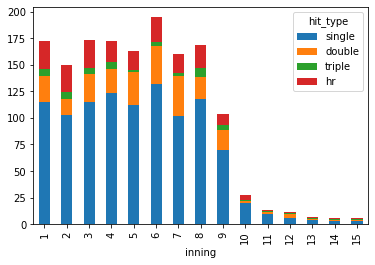

In [11]:
hits = hits.fillna(1.0)
plt.figure(figsize=(15,7))
hits.plot.bar(stacked=True)
plt.show()